Import user items data from json to csv and then to data frame

In [47]:
import csv
import ast
import json
import pandas as pd

csv_columns = ['user_id','item_id','item_name','playtime_forever']

with open('australian_users_items.json', encoding='utf-8') as data_file:
    
    with open('output_australian_users_items.csv', 'w', encoding='utf-8', newline='') as csv_file:
        line = data_file.readline()
        writer = csv.DictWriter(csv_file, fieldnames=csv_columns)
        writer.writeheader()
        while line:
            json_data = (ast.literal_eval(line))
            line = data_file.readline()
            for item in json_data["items"]:
                new_dict_data={'user_id':json_data["user_id"],'item_id':item['item_id'],'item_name':item['item_name'],'playtime_forever':item['playtime_forever']}
            
                writer.writerow(new_dict_data)
                line = data_file.readline()

In [48]:
print(__doc__)

import numpy as np
import scipy as sp
import pandas as pd

from sklearn.preprocessing import Imputer

#read the csv into a dataframe
users_items_df = pd.read_csv('output_australian_users_items.csv')


Automatically created module for IPython interactive environment


Import user review data to csv and then to data frame

In [49]:
import csv
import ast
import json
import pandas as pd

csv_columns = ['user_id','item_id','recommend']

with open('australian_user_reviews.json', encoding='utf-8') as data_file:
    
    with open('output_australian_user_reviews.csv', 'w', encoding='utf-8', newline='') as csv_file:
        line = data_file.readline()
        writer = csv.DictWriter(csv_file, fieldnames=csv_columns)
        writer.writeheader()
        while line:
            json_data = (ast.literal_eval(line))
            line = data_file.readline()
            for review in json_data["reviews"]:
                new_dict_data={'user_id':json_data["user_id"],'item_id':review['item_id'],'recommend':review['recommend']}
            
                writer.writerow(new_dict_data)
                line = data_file.readline()



In [50]:
print(__doc__)

import numpy as np
import scipy as sp
import pandas as pd

from sklearn.preprocessing import Imputer

#read the csv into a dataframe
user_reviews_df = pd.read_csv('output_australian_user_reviews.csv')


Automatically created module for IPython interactive environment


Merge items data and review data

In [51]:
merged_df = pd.merge(user_reviews_df, users_items_df, on=['item_id','user_id'], how='outer')
merged_df.head()

,user_id,item_id,recommend,item_name,playtime_forever
0,76561197970982479,1250,True,Killing Floor,10006.0
1,76561197970982479,22200,True,Zeno Clash,271.0
2,76561197970982479,43110,True,Metro 2033,834.0
3,maplemage,211420,True,NaN,NaN
4,maplemage,211820,True,NaN,NaN


IMport bundle data from which we will get genre for items

In [52]:
import csv
import ast
import json
import pandas as pd

import csv
import ast
import json
import pandas as pd

csv_columns = ['bundle_id','item_id','genre','discounted_price','bundle_final_price','bundle_price','bundle_name']

with open('bundle_data.json', encoding='utf-8') as data_file:
    
    with open('output_bundle_data.csv', 'w', encoding='utf-8', newline='') as csv_file:
        line = data_file.readline()
        writer = csv.DictWriter(csv_file, fieldnames=csv_columns)
        writer.writeheader()
        while line:
            json_data = (ast.literal_eval(line))
            line = data_file.readline()
            for item in json_data["items"]:
                new_dict_data={'bundle_id':json_data["bundle_id"],'item_id':item['item_id'],'genre':item['genre'],'discounted_price':item['discounted_price'],'bundle_final_price':json_data["bundle_final_price"],'bundle_price':json_data["bundle_price"],'bundle_name':json_data["bundle_name"]}
            
                writer.writerow(new_dict_data)
                line = data_file.readline()



In [53]:
print(__doc__)

import numpy as np
import scipy as sp
import pandas as pd

from sklearn.preprocessing import Imputer

#read the csv into a dataframe
bundle_df = pd.read_csv('output_bundle_data.csv')


Automatically created module for IPython interactive environment


In [54]:
bundle_df['item_id'] = bundle_df['item_id'].astype('str') 

In [55]:
merged_df['item_id'] = merged_df['item_id'].astype('str') 

Merge all data

In [56]:
merged_df_final = pd.merge(merged_df, bundle_df, on=['item_id'], how='outer')
merged_df_final.head()

,user_id,item_id,recommend,item_name,playtime_forever,bundle_id,genre,discounted_price,bundle_final_price,bundle_price,bundle_name
0,76561197970982479,1250,True,Killing Floor,10006.0,612.0,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!
1,death-hunter,1250,True,NaN,NaN,612.0,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!
2,diego9031,1250,True,NaN,NaN,612.0,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!
3,GamerFag,1250,True,NaN,NaN,612.0,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!
4,brendoboy,1250,True,NaN,NaN,612.0,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!


Clean data

In [57]:
cleaned_data=merged_df_final[(merged_df_final.item_id != '200960,200980,200990,201000,201010') & (merged_df_final.item_id!='42170,204731,204732') & (merged_df_final.item_id!='10,80')]

In [58]:
new_data=cleaned_data[['item_id','genre']]

In [59]:
new_data.describe()

,item_id,genre
count,104032,6442
unique,6326,76
top,730,Action
freq,2059,3018


In [60]:
new_data['item_id'].unique()

array(['1250', '22200', '43110', ..., '385230', '387880', '454130'],
      dtype=object)

In [61]:
new_data=new_data.drop_duplicates()

In [62]:
new_data.head()

,item_id,genre
0,1250,Action
369,22200,NaN
390,43110,NaN
573,211420,NaN
719,211820,NaN


In [63]:
new_data=new_data[(new_data["genre"].notnull())]

Item Id with genre

In [64]:
new_data.head(100)

,item_id,genre
0,1250,Action
967,730,Action
18590,8930,Strategy
22747,49520,"Action, RPG"
25702,261640,"Action, RPG"
26163,265930,"Casual, Indie, Simulation"
29740,313740,Indie
29796,330830,Adventure
29834,240,Action
31466,289130,"Indie, RPG, Strategy"


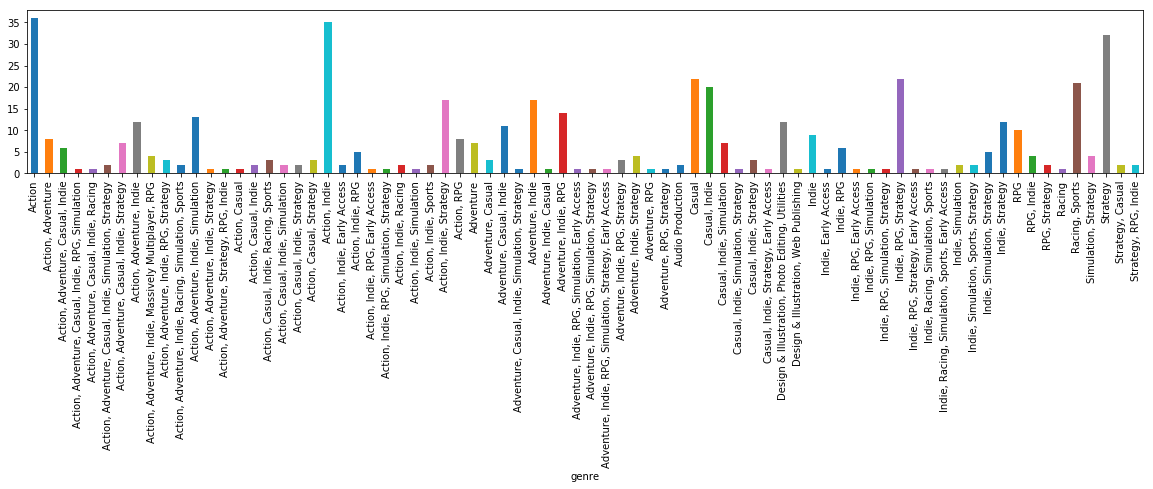

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(20, 3))
new_data.groupby('genre')['item_id'].nunique().plot(kind='bar')
plt.show()

Splitting genre with ,

In [66]:
new_data['genre'] = new_data['genre'].map(lambda x: x.lower().split(','))

Indexing by item id

In [67]:
new_data.set_index('item_id', inplace = True)
new_data.head()

,genre
item_id,
1250,[action]
730,[action]
8930,[strategy]
49520,"[action, rpg]"
261640,"[action, rpg]"


In [68]:
new_data['bag_of_words'] = ''
columns = new_data.columns
for index, row in new_data.iterrows():
    words = ''
    for col in columns:
        words = words + ' '.join(row[col])+ ' '

    row['bag_of_words'] = words
    
new_data.drop(columns = [col for col in new_data.columns if col!= 'bag_of_words'], inplace = True)

Using sklearn count vectorizer performing content based cosine similarity

In [69]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(new_data['bag_of_words'])

# creating a Series for the game id so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(new_data.index)
indices[:5]

0      1250
1       730
2      8930
3     49520
4    261640
Name: item_id, dtype: object

In [70]:

# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 1.        , 0.        , ..., 0.57735027, 0.57735027,
        0.70710678],
       [1.        , 1.        , 0.        , ..., 0.57735027, 0.57735027,
        0.70710678],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.57735027, 0.57735027, 0.        , ..., 1.        , 1.        ,
        0.81649658],
       [0.57735027, 0.57735027, 0.        , ..., 1.        , 1.        ,
        0.81649658],
       [0.70710678, 0.70710678, 0.        , ..., 0.81649658, 0.81649658,
        1.        ]])

Function with input item id and output top 10 similar games

In [71]:
# function that takes in game id as input and returns the top 10 recommended games
def recommendations(item_id, cosine_sim = cosine_sim):
    
    recommended_games = []
    
    # gettin the index of the games that matches the id
    idx = indices[indices == item_id].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar games
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching games
    for i in top_10_indexes:
        recommended_games.append(list(new_data.index)[i])
        
    return recommended_games

Game with id 1250 with top 10 similar games

In [72]:
recommendations('1250')

['210932',
 '359495',
 '309991',
 '359497',
 '373540',
 '411400',
 '411401',
 '1256',
 '1257',
 '35417']